# PyTorch workflow

In [193]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch versino
torch.__version__

'2.2.1+cu121'

In [194]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10],

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [195]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### Splitting data into training and test sets

In [196]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize our data

In [197]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_label, c='r', s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='g', s=4, label="predictions")

  plt.legend(prop={"size":14})

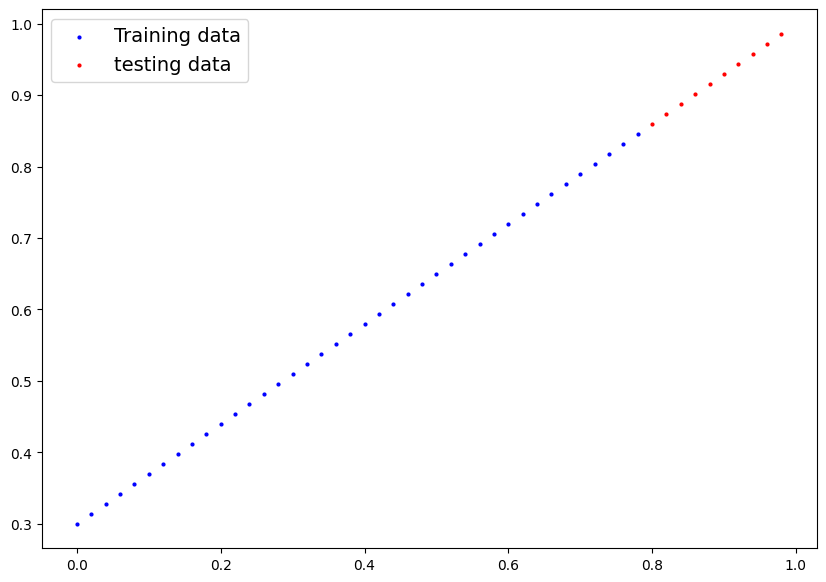

In [198]:
plot_predictions()

## 2. Build Model

In [199]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


### Checking the contents of our PyTorch model


In [200]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [201]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

In [202]:
with torch.inference_mode():
  y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

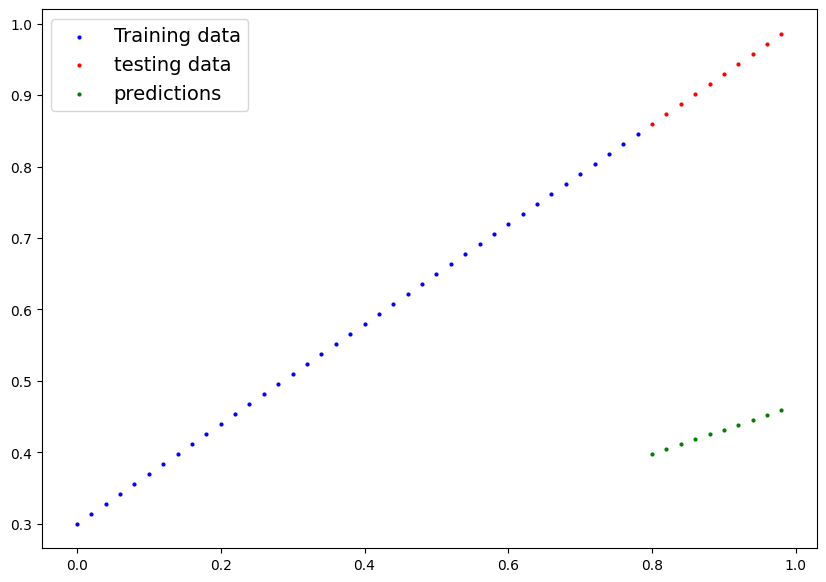

In [203]:
plot_predictions(predictions=y_preds)

## 3. Train model

In [204]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01)

In [205]:
loss_fn

L1Loss()

### Building a training loop in pytorch

In [206]:
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Perform backpropagation
  loss.backward()

  # Step the optimizer
  optimizer.step()

  # testing mode
  model_0.eval()

  with torch.inference_mode(): # turns off gradient tracking...
    #forward pass
    test_pred = model_0(X_test)


    # calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | loss:{loss}, val_loss:{test_loss}')


model_0.state_dict()

Epoch: 0 | loss:0.31288138031959534, val_loss:0.48106518387794495
Epoch: 10 | loss:0.1976713240146637, val_loss:0.3463551998138428
Epoch: 20 | loss:0.08908725529909134, val_loss:0.21729660034179688
Epoch: 30 | loss:0.053148526698350906, val_loss:0.14464017748832703
Epoch: 40 | loss:0.04543796554207802, val_loss:0.11360953003168106
Epoch: 50 | loss:0.04167863354086876, val_loss:0.09919948130846024
Epoch: 60 | loss:0.03818932920694351, val_loss:0.08886633068323135
Epoch: 70 | loss:0.03476089984178543, val_loss:0.0805937647819519
Epoch: 80 | loss:0.03132382780313492, val_loss:0.07232122868299484
Epoch: 90 | loss:0.02788739837706089, val_loss:0.06473556160926819
Epoch: 100 | loss:0.024458957836031914, val_loss:0.05646304413676262
Epoch: 110 | loss:0.021020207554101944, val_loss:0.04819049686193466
Epoch: 120 | loss:0.01758546568453312, val_loss:0.04060482233762741
Epoch: 130 | loss:0.014155393466353416, val_loss:0.03233227878808975
Epoch: 140 | loss:0.010716589167714119, val_loss:0.0240597

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [207]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

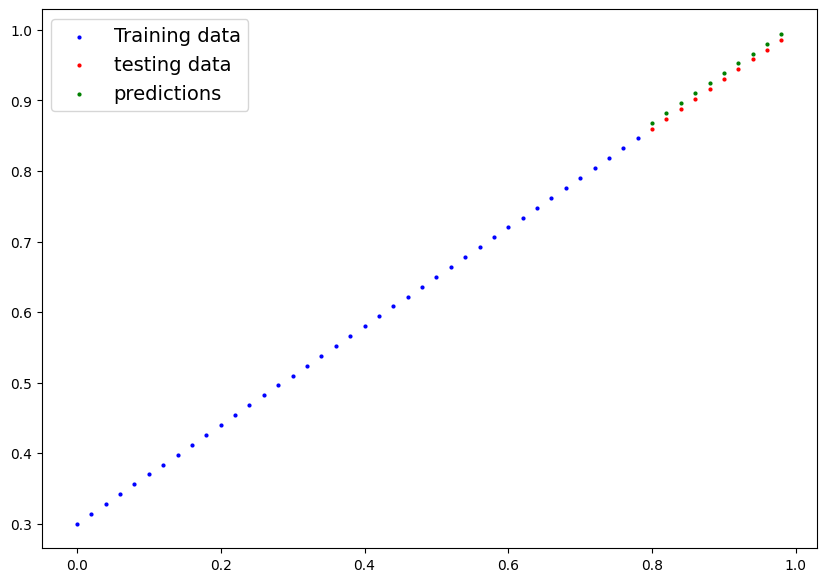

In [208]:
plot_predictions(predictions=y_pred_new)

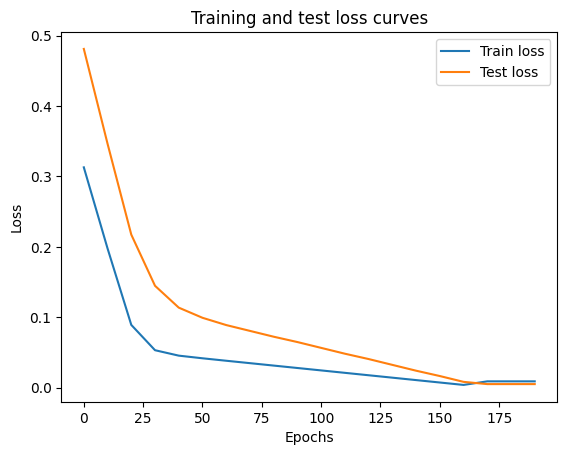

In [209]:

plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

In [210]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)

models/01_pytorch_workflow_model_0.pth


In [211]:
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [212]:
model = LinearRegressionModel()
model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [215]:
model_0.state_dict(), model.state_dict()

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [213]:
y_pred = model(X_test)
loss_fn(y_pred, y_test)

tensor(0.0084, grad_fn=<MeanBackward0>)

In [214]:
loss_fn(model_0(X_test), y_test)

tensor(0.0084, grad_fn=<MeanBackward0>)

In [ ]:
model.eval()

LinearRegressionModel()